<a href="https://colab.research.google.com/github/rodrigoromanguzman/Actividades_Aprendizaje-/blob/main/semana6/module3_python_for_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Rodrigo Ildefonso Roman Guzman|A01794225|Jobish|Semana 5 (Ocubre 13 2022)</h1>

<h2>Data Preprocessing with Python <b>Module 2</b><h2/>

  <li>Dealing with missing values:
    <ul>
      <li>Remove the missing values:
      </li>
      <li>Drop the entry
      </li>
      <li>Repace by frequency or by average
      </li>
    </ul>
  </li>
  <li>Data Formating: 
    <ul>
      <li>Ensures that the data is consistent:
      </li>
    </ul>
  </li>
  <li>Data normalization <i>(Helps to have equal weight among features)</i>: 
    <ul>
      <li>MinMax scaling
      </li>
      <li>Z-Score
      </li>
    </ul>
  </li>
  <li>Binning: 
    <ul>
      <li>Grouping of values into bins
      </li>
      <li>Converts numeric values into categorical variables
      </li>
      <li>We can categorize into "low","mid" and "high" for instance
      </li>
    </ul>
  </li>

</ol>

In [ ]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np


<h3>Import libraries</h3>


In [ ]:
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df = pd.read_csv(filename, names = headers)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<h3>We identify the missing values</h3>

In [ ]:
local_df = df.copy()
local_df.replace("?", np.nan, inplace = True)

print(local_df.head(5))

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3               NaN  alfa-romero       gas        std          two   
1          3               NaN  alfa-romero       gas        std          two   
2          1               NaN  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio hor

<p>We can figure out the number of missing values by column in the following way</p>

In [ ]:
missing_data = df.isnull()
missing_data.head(5)
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    205
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    205
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
False    205
Name: fuel-syst

<h4>Calculate the mean value for the "normalized-losses" column </h4>

In [ ]:
avg_norm_loss = local_df["normalized-losses"].astype("float").mean(axis=0)
local_df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)
local_df.dropna(subset = [''])
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


<p>We can check the datatypes that we have in our dataset</p>

In [ ]:
local_df.dtypes # a partir de esto podriamos corregir los tipos

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

<p>We can also convert the types as we need</p>

In [ ]:
local_df[["bore", "stroke"]] = local_df[["bore", "stroke"]].astype("float")
local_df[["normalized-losses"]] = local_df[["normalized-losses"]].astype("int")
local_df[["price"]] = local_df[["price"]].astype("float")
local_df[["peak-rpm"]] = local_df[["peak-rpm"]].astype("float")

<p>Tambien podemos entender mejor nuestros datos con la funcion info()</p>

In [ ]:
local_df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

<h3>Data normalization</h3>

In [ ]:
local_df['length'] = local_df['length']/local_df['length'].max()
local_df['width'] = local_df['width']/local_df['width'].max()
local_df['height'] = local_df['height']/local_df['height'].max()

print(local_df.head())

   symboling  normalized-losses         make fuel-type aspiration  \
0          3                122  alfa-romero       gas        std   
1          3                122  alfa-romero       gas        std   
2          1                122  alfa-romero       gas        std   
3          2                164         audi       gas        std   
4          2                164         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0          130         mpfi  3.47    2.68       

<h3>Binning</h3>

In [ ]:
# we need to convert to the right type
avg_horsepower = local_df['horsepower'].astype('float').mean(axis=0)
local_df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)
local_df["horsepower"]= local_df["horsepower"].astype(int, copy=True)


In [ ]:
# we create four equally spaced values between the min and max of hosepower
bins = np.linspace(min(local_df["horsepower"]), max(local_df["horsepower"]), 4)

# We define the labels that we will use
group_names = ['Low', 'Medium', 'High']

#apply the cut function for segment and sort into bins
local_df['horsepower-binned'] = pd.cut(local_df['horsepower'], bins, labels=group_names, include_lowest=True )
local_df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,160,Medium


<h4>Lastly we plot the labeled results</h4>

Text(0.5, 1.0, 'horsepower bins')

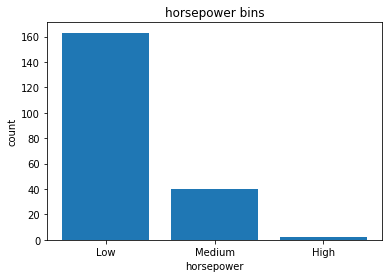

In [ ]:
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, local_df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Text(0.5, 1.0, 'horsepower bins')

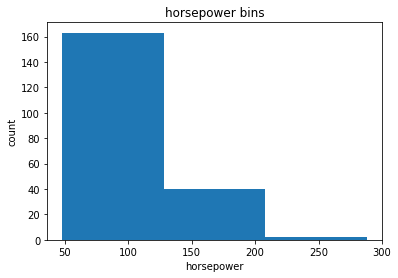

In [ ]:

# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(local_df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")